In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
def fold_panels(P):
    m = len(P)
    Z = np.zeros((2,2,2))
    for i in range(m):
        Z[:,:,i] = np.array(P[i], dtype=np.float64)
    return Z

In [3]:
def unfold(P):
    m = P.ndim
    R = np.zeros((2, 2**(P.ndim - 1)))
    for i in range(m-1):
        R[0:2, i*2:(i+1)*2] = P[:,:,i]
    return R

In [4]:
P = fold_panels([ [[0,1],[1,0]], [[1,1],[0,0]] ])
P

array([[[0., 1.],
        [1., 1.]],

       [[1., 0.],
        [0., 0.]]])

In [5]:
R = unfold(P)
R

array([[0., 1., 1., 1.],
       [1., 0., 0., 0.]])

In [6]:
x = np.array([0.5,0.5])

In [7]:
def Pi(M):
    # Steady state distribution of stochastic matrix
    x = np.random.rand(2)
    x /= la.norm(x,1)
    for i in range(100):
        x = M@x
    return x

In [8]:
print(Pi(P[:,:,0]))
print(Pi(P[:,:,1]))

[0.92763252 0.07236748]
[1. 0.]


In [9]:
def M(R, x):
    return R@np.kron(x.reshape((2,1)), np.eye(2))

In [10]:
Pi(M(R, np.array([0.25,0.75])))

array([0.8, 0.2])

In [11]:
def dxdt(R, x):
    return Pi(M(R,x)) - x

In [12]:
sp = np.linspace(0, 1, 100)
y = np.zeros(100)
for i in range(100):
    xx = sp[i]
    y[i] = la.norm(dxdt(R, np.array([xx,1-xx])))

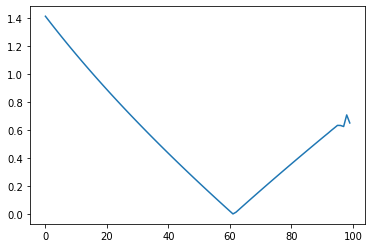

In [13]:
plt.plot(y)

In [14]:
xtrue = np.array([(np.sqrt(5)-1)/2, (3 - np.sqrt(5))/2])
xtrue

array([0.61803399, 0.38196601])

[0.61803399 0.38196601] [-4.19411172e-11  4.19387303e-11]
24


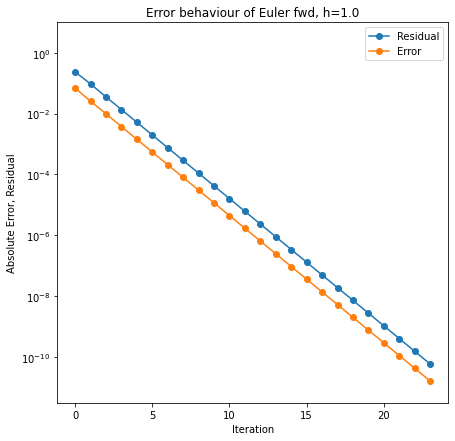

In [23]:
res = []
err = []
x = np.array([0.5, 0.5])
while True:
    dx = dxdt(R,x)
    x += dx
    x /= la.norm(x,1)
    res.append(la.norm(dx))
    err.append(la.norm(x - xtrue))
    if la.norm(dx) < 1e-10:
        break
print(x, dx)
plt.figure(figsize=(7,7))
plt.xlabel('Iteration')
plt.ylabel('Absolute Error, Residual')
plt.title('Error behaviour of Euler fwd, h=1.0')
plt.semilogy(res, 'o-', label='Residual')
plt.semilogy(err, 'o-', label='Error')
plt.legend()
plt.ylim(10**-11.5, 10)
print(len(err))

(3.1622776601683794e-12, 10)

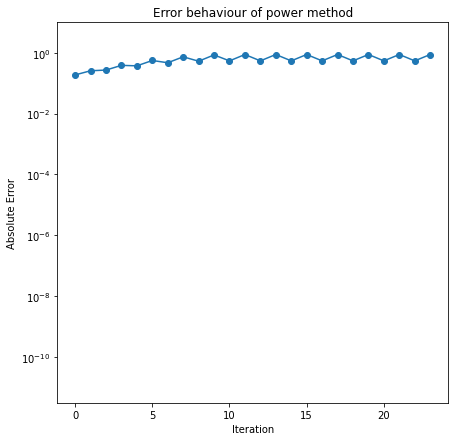

In [24]:
x = np.array([0.5,0.5])
prev_iter = 24
res = []
err = []

for i in range(prev_iter):
    x = R@np.kron(x,x)
    err.append(la.norm(x-xtrue))

plt.figure(figsize=(7,7))
plt.xlabel('Iteration')
plt.ylabel('Absolute Error')
plt.title('Error behaviour of power method')
plt.semilogy(err, 'o-', label='Error')
plt.ylim(10**-11.5, 10)